1. Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

Use high_pass, low_pass, and band_stop to filter out some of the harmonics. Then convert the spectrum back to a wave and listen to it. How does the sound relate to the changes you made in the spectrum?

去http://freesound.org 下載聲音樣本包括音樂，語音或其他音調明確的聲音。選擇一個大約半秒的音高恆定的片段。計算並繪製所選段的光譜。 可以在聲音的音色和頻譜中看到的諧波結構之間建立什麼聯繫？

使用high_pass，low_pass和band_stop過濾掉一些諧波。然後將頻譜轉換回一波並聽一聽。聲音與您在頻譜中所做的更改有何關係？

In [1]:
from thinkdsp import read_wave

wave = read_wave('170255__dublie__trumpet.wav')
wave.normalize()
wave.make_audio()

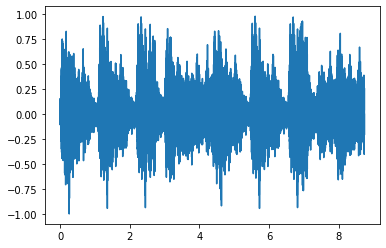

In [2]:
wave.plot()

選擇一個大約半秒的音高恆定的片段

In [3]:
segment = wave.segment(start=2.2, duration=0.5)
segment.make_audio()

繪製所選段的光譜。

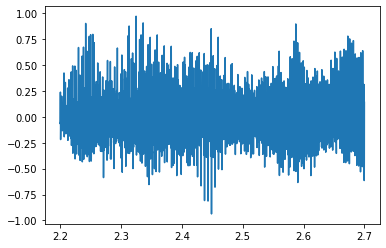

In [4]:
segment.plot()

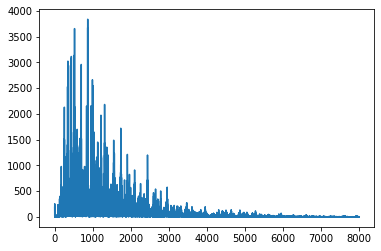

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot(high=8000)

In [6]:
spectrum.low_pass(2000)
spectrum.make_wave().make_audio()

In [7]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='red')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [8]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…